In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_experiments.library.tomography import StateTomography
from qiskit.visualization import plot_state_city
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.quantum_info import state_fidelity

In [2]:
#Criação do Circuito
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)


In [3]:
# Matriz Ideal
bell_sv = Statevector.from_label('00').evolve(qc)
rho_ideal = DensityMatrix(bell_sv)
print(rho_ideal)

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


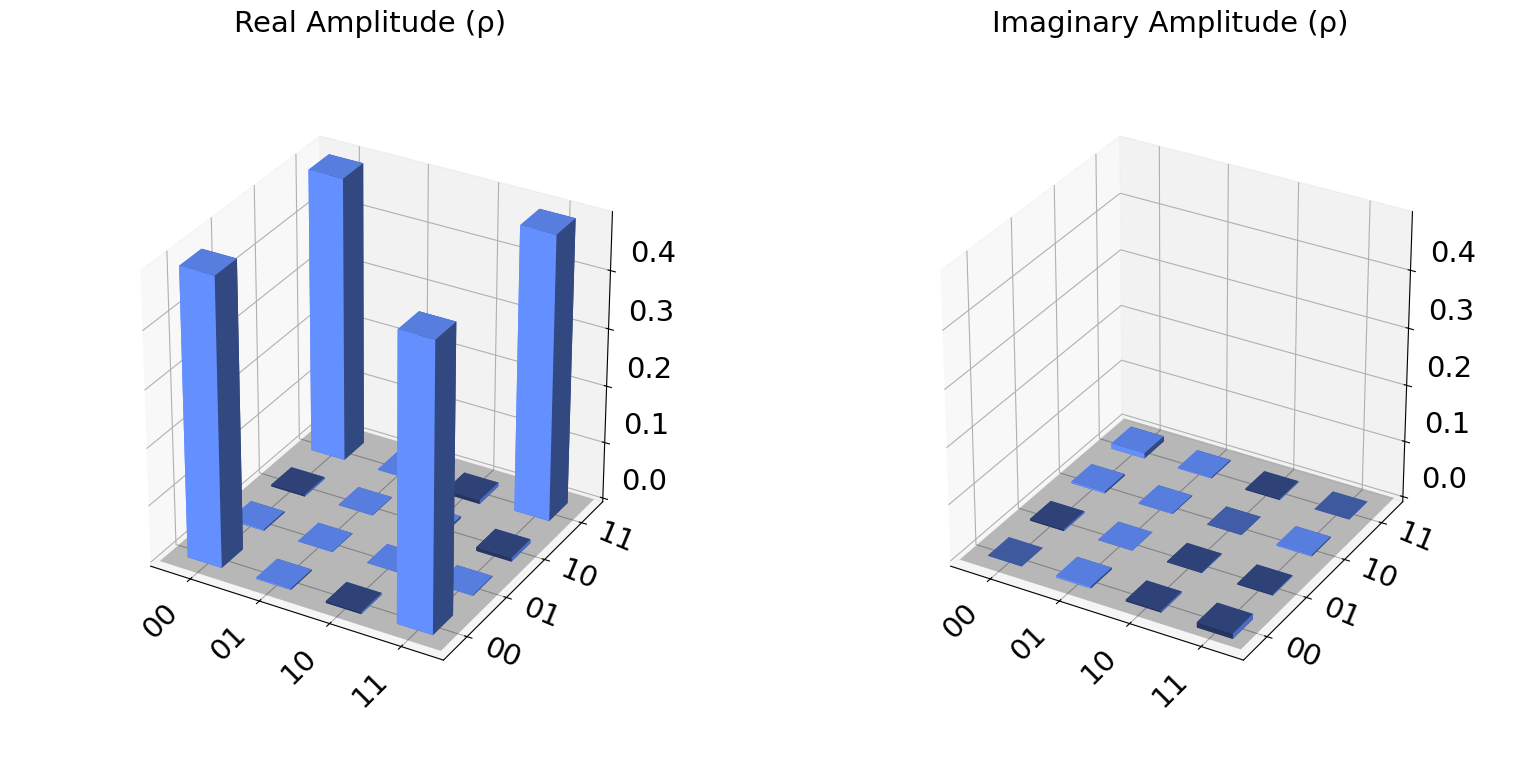

In [6]:
plot_state_city(rho_ideal)

In [4]:
tomo = StateTomography(qc)

simulator = AerSimulator()
result = tomo.run(simulator, shots=5000).block_for_results()

#Matriz densidade
rho_fit = result.analysis_results("state").value
print("Matriz densidade estimada:\n", rho_fit.data)

Matriz densidade estimada:
 [[ 4.93188809e-01+0.00000000e+00j  8.95993316e-04-1.83339359e-03j
  -1.39156677e-03-3.75112446e-03j  4.96942452e-01+4.34625047e-03j]
 [ 8.95993316e-04+1.83339359e-03j  3.04864515e-04+0.00000000e+00j
   1.14383809e-04+8.70967919e-04j  7.41719393e-04+2.79418614e-03j]
 [-1.39156677e-03+3.75112446e-03j  1.14383809e-04-8.70967919e-04j
   2.69830235e-03+0.00000000e+00j  1.31128583e-03+4.52529496e-03j]
 [ 4.96942452e-01-4.34625047e-03j  7.41719393e-04-2.79418614e-03j
   1.31128583e-03-4.52529496e-03j  5.03808024e-01+8.67361738e-19j]]


C:\Users\ianre\AppData\Local\Temp\ipykernel_15828\963032125.py:7: DeprecationWarning: Leaving `dataframe` unset or setting it to `False` for `ExperimentData.analysis_results` is deprecated as of qiskit-experiments 0.9.0. Future releases may change the default to `True` and remove the option to set the value to `False`.
  rho_fit = result.analysis_results("state").value


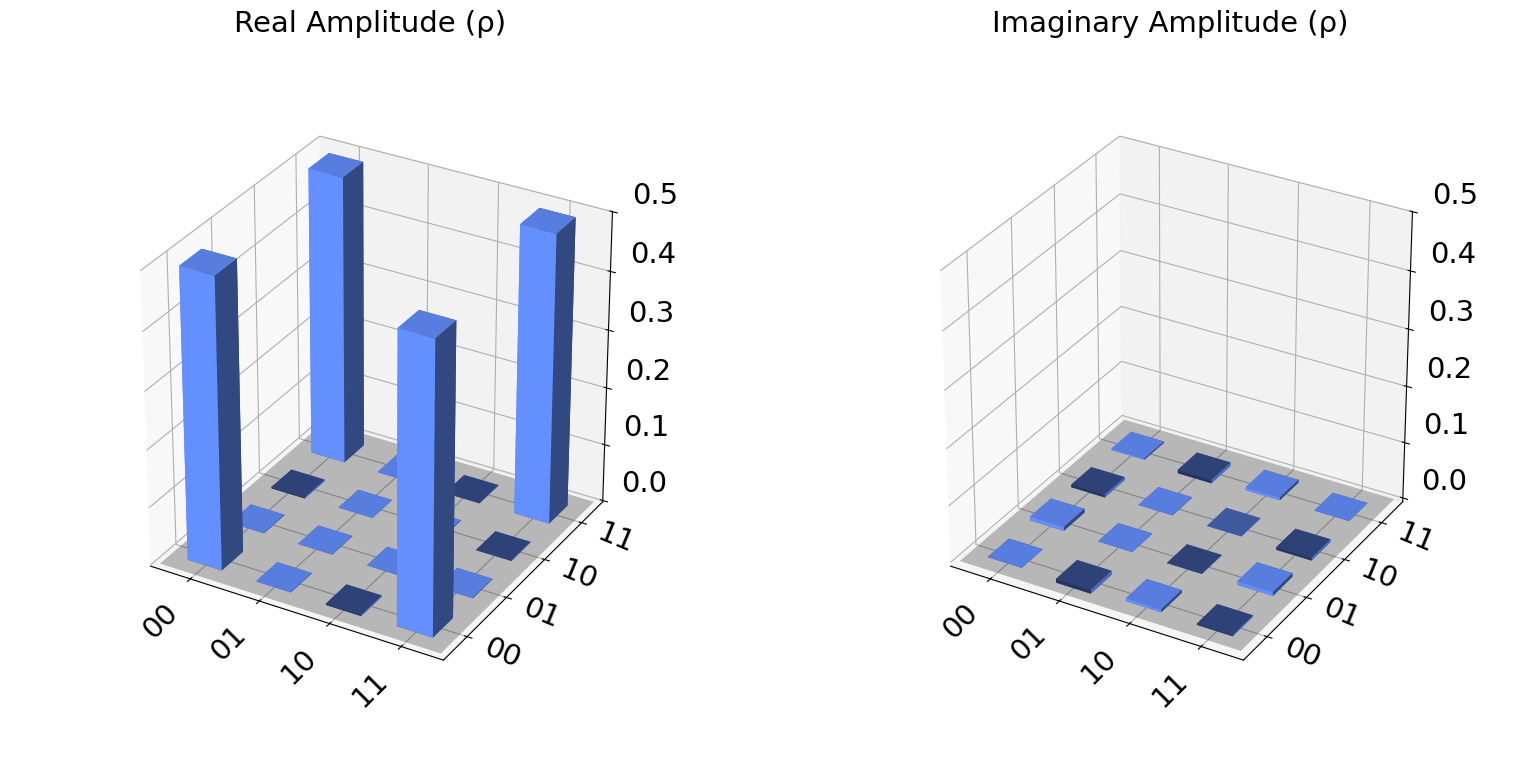

In [9]:
plot_state_city(rho_fit)

In [40]:
fid = state_fidelity(rho_fit, rho_ideal)
print(f"Fidelidade do estado reconstruído: {fid:.5f}")

Fidelidade do estado reconstruído: 0.99369
